In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

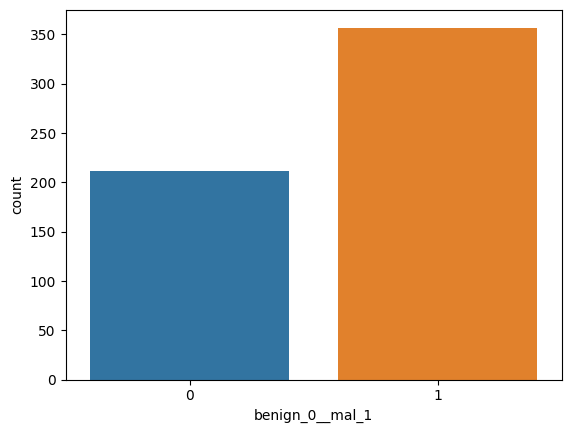

In [6]:
sns.countplot(x="benign_0__mal_1", data=df)

<AxesSubplot: >

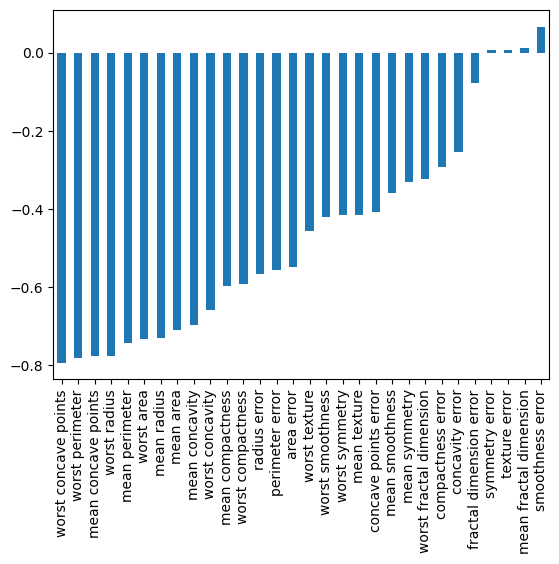

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [8]:
X = df.drop('benign_0__mal_1', axis=1).values

y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense, Dropout

In [17]:
X_train.shape

(426, 30)

In [18]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 17ms/step - loss: 0.6915 - val_loss: 0.6780
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6621 - val_loss: 0.6445
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6211 - val_loss: 0.5997
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5761 - val_loss: 0.5568
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5306 - val_loss: 0.5086
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4829 - val_loss: 0.4596
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4346 - val_loss: 0.4084
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3859 - val_loss: 0.3582
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3441 - val_loss: 0.3171
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3066 - val_loss: 0.2823
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0547 - val_loss: 0.1158
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0530 - val_loss: 0.1139
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.1165
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0505 - val_loss: 0.1178
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0503 - val_loss: 0.1234
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0573 - val_loss: 0.1143
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.1170
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.1233
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0519 - val_loss: 0.1175
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.1211
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.1434
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.1513
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.1520
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.1494
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0448 - val_loss: 0.1542
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.1529
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0368 - val_loss: 0.1525
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.1431
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.1501
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.1636
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1875
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.1888
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.1856
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.1825
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.2015
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.1799
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.1963
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.2069
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.1762
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0283 - val_loss: 0.1916
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.2161
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.2337
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.2280
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0225 - val_loss: 0.2349
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.2090
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.2560
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.2155
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.2365
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.2320
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.2516
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.2647
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.3012
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.2617
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.3040
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.2469
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.3223
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.2657
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.2992
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.2946
Epoch 416/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.2644
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.3188
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.3370
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.3176
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.3137
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.3588
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.3459
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.3260
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.3584
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.3136
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.3554
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.3651
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.4022
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.3733
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.4344
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.3602
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.4065
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.4187
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.3589
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.4173
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.4132
Epoc

In [20]:
losses = pd.DataFrame(model.history.history)

In [21]:
losses

,loss,val_loss
0,0.691549,0.677976
1,0.662134,0.644500
2,0.621123,0.599694
3,0.576125,0.556770
4,0.530608,0.508557
...,...,...
595,0.004242,0.427392
596,0.004504,0.424911
597,0.004361,0.387031
598,0.005270,0.450799


<AxesSubplot: >

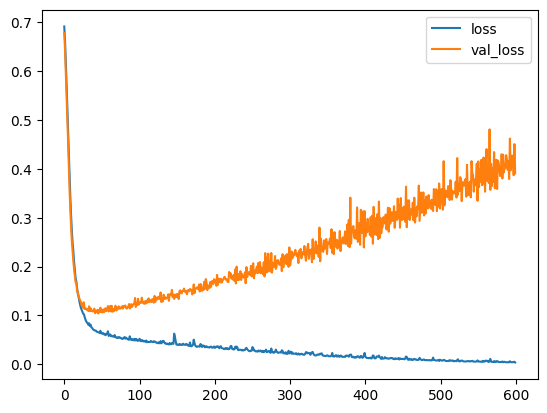

In [22]:
# Model have overfitting issue because of high epochs value
losses.plot()

In [23]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
# It will automatically stop model training when val_loss will increase
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# help(EarlyStopping)

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6847 - val_loss: 0.6642
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6471 - val_loss: 0.6328
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6125 - val_loss: 0.5984
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5778 - val_loss: 0.5592
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5388 - val_loss: 0.5104
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4914 - val_loss: 0.4501
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4342 - val_loss: 0.3958
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3870 - val_loss: 0.3489
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3454 - val_loss: 0.3085
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3111 - val_loss: 0.2759
Epoch 11/

In [28]:
model_loss = pd.DataFrame(model.history.history)

In [29]:
model_loss

,loss,val_loss
0,0.684717,0.664209
1,0.647144,0.632767
2,0.612546,0.598444
3,0.577850,0.559218
4,0.538828,0.510414
...,...,...
72,0.051548,0.097504
73,0.053663,0.097251
74,0.050737,0.107509
75,0.054566,0.104157


<AxesSubplot: >

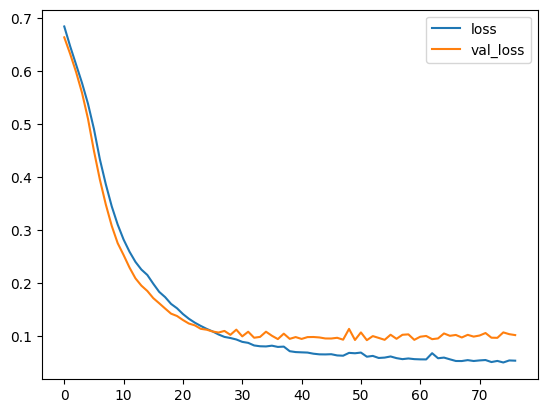

In [30]:
model_loss.plot()

In [31]:
# Adding dropout layers to prevent overfitting
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7367 - val_loss: 0.6736
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6741 - val_loss: 0.6435
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6608 - val_loss: 0.6173
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6247 - val_loss: 0.5938
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6151 - val_loss: 0.5687
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5757 - val_loss: 0.5385
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5828 - val_loss: 0.5099
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5499 - val_loss: 0.4824
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5261 - val_loss: 0.4531
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5064 - val_loss: 0.4238
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1299 - val_loss: 0.1095
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1158 - val_loss: 0.0960
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1146 - val_loss: 0.0947
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1104 - val_loss: 0.0944
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1062 - val_loss: 0.0915
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1192 - val_loss: 0.1038
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1053 - val_loss: 0.1059
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1258 - val_loss: 0.0907
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1121 - val_loss: 0.0904
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1014 - val_loss: 0.0988
Epoch 93/600


In [34]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot: >

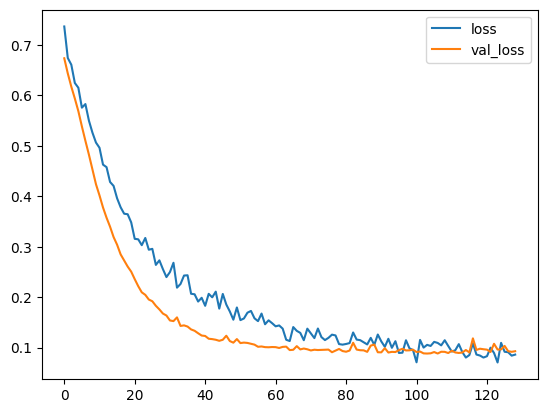

In [35]:
model_loss.plot()

In [36]:
model_loss

,loss,val_loss
0,0.736662,0.673601
1,0.674139,0.643539
2,0.660837,0.617291
3,0.624653,0.593806
4,0.615139,0.568686
...,...,...
124,0.109298,0.096276
125,0.091616,0.103291
126,0.090764,0.092795
127,0.083918,0.091553


In [38]:
# Prediction for classifier
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 2s 1ms/step


In [39]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [42]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
